# Importing Libraries

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 9778 files belonging to 21 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___healthy']


# Loading Model

In [6]:
cnn = tf.keras.models.load_model('models/5/5.keras')

In [7]:
save_dir_final = "./models/"
model_version_final = "generalFinalAI"
# Save the model
cnn.save(f"{save_dir_final}{model_version_final}.h5")

#Visualising and Performing Prediction on Single image

Pixel values at (0, 0): [123 136 168]


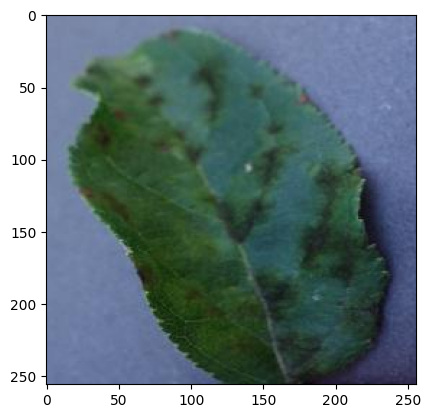

In [24]:
import cv2
import matplotlib.pyplot as plt
image_path="test/Apple___Apple_scab/AppleScab2.JPG"
# Read the image
img = cv2.imread(image_path)

# Check if the image is not empty
if img is not None:
    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pixel_values = img[0, 0]  # Accessing the pixel at the top-left corner
    print("Pixel values at (0, 0):", pixel_values)
    # Display the image
    plt.imshow(img)
    plt.show()
else:
    print("Failed to read the image. Please check the image path.")


## Testing Model

In [25]:
def predict(model, image_path):
    image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    predictions = cnn.predict(input_arr)
    result_index = np.argmax(predictions)
    model_prediction = class_name[result_index]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return model_prediction, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


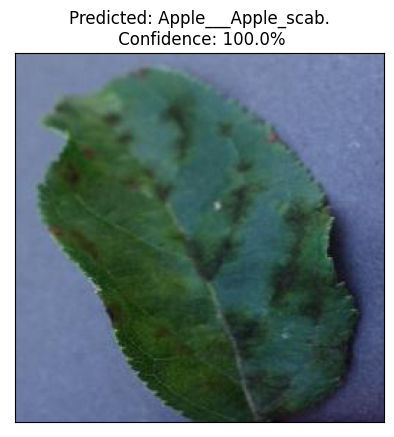

In [26]:
# Displaying the disease prediction
predicted_class, confidence = predict(cnn, image_path)

plt.imshow(img)
plt.title(f"Predicted: {predicted_class}.\n Confidence: {confidence}%")

plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
import tensorflow as tf

# Load the model from the .keras file
model = tf.keras.models.load_model('models/1/1.keras')

# Save the model in the SavedModel format
tf.saved_model.save(model, 'models/1/')
